In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import pandas as pd


od.download(
    "https://www.kaggle.com/datasets/programmerrdai/-big-company-money")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jemuelveroja
Your Kaggle Key: ··········


100%|██████████| 146k/146k [00:00<00:00, 21.7MB/s]

In [3]:
df = pd.read_csv('/content/-big-company-money/companiesmarketcap.com - Companies ranked by earnings - CompaniesMarketCap.com.csv')
money = df.rename(columns={'price (USD)': 'price', 'earnings_ttm': 'earnings'})
money

,Rank,Name,Symbol,earnings,price,country
0,1,Saudi Aramco,2222.SR,2.422190e+11,10.95,Saudi Arabia
1,2,Apple,AAPL,1.217190e+11,148.71,United States
2,3,Berkshire Hathaway,BRK-A,1.081260e+11,469620.00,United States
3,4,Alphabet (Google),GOOG,8.873800e+10,2282.74,United States
4,5,Microsoft,MSFT,8.475400e+10,272.42,United States
...,...,...,...,...,...,...
6271,6272,Carnival,CCL,-7.860000e+09,13.47,United States
6272,6273,Orange,ORAN,-8.057060e+09,12.43,France
6273,6274,Uniper,UN01.DE,-1.070760e+10,24.90,Germany
6274,6275,Veolia,VIE.PA,-1.483710e+10,27.63,France


In [4]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rank      6276 non-null   int64  
 1   Name      6276 non-null   object 
 2   Symbol    6276 non-null   object 
 3   earnings  6276 non-null   float64
 4   price     6276 non-null   float64
 5   country   6276 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 294.3+ KB


### **Exploratory Data Analysis (EDA)**
#### Deskripsi Variabel
1.   Rank : ranking perusahaan secara global
2.   Name : nama perusahaan tersebut
3.   symbol : simbol perusahaan tersebut
4.   earnings: pendapatan perusahaan tersebut
5.   price : harga yang ditetapkan perusahaan terkait produk nya
6.   Country : negara perushaan tersebut




In [5]:
#pengecekan apakah data yang kosong
money.isnull().sum()

Rank        0
Name        0
Symbol      0
earnings    0
price       0
country     0
dtype: int64

In [6]:
#exploratory statistic information

money.describe()

,Rank,earnings,price
count,6276.000000,6.276000e+03,6276.000000
mean,3138.500000,1.010560e+09,200.177086
std,1811.869477,5.075043e+09,6130.544423
min,1.000000,-2.622600e+10,0.000000
25%,1569.750000,-1.122500e+06,5.587500
50%,3138.500000,1.019150e+08,19.910000
75%,4707.250000,6.381250e+08,54.452500
max,6276.000000,2.422190e+11,469620.000000


dari nilai minimum tersebut, pada kolom price nilainya adalah 0, jadi ada kemungkinan bahwa terdapat missing value


In [7]:
#kita cek berapa missing value pada data tersebut

price = (money.price == 0).sum()

print(price)

4


In [8]:
#selanjutnya kita cek dimanakah data yang bernilai 0 tersebut

money.loc[(money['price']==0)]

,Rank,Name,Symbol,earnings,price,country
4483,4484,Intensity Therapeutics,INTS,0.0,0.0,United States
4568,4569,Justworks,JW,0.0,0.0,United States
4573,4574,Verdant Earth Technologies,VDNT,0.0,0.0,Australia
4766,4767,Trulite,TRUL,-4281850.0,0.0,United States


In [9]:
#selanjutnya kita drop nilai 'price' yang bernilai 0 tersebut

money = money.loc[(money[['price']]!=0).all(axis=1)]

money.shape

(6272, 6)

In [10]:
money.describe()

,Rank,earnings,price
count,6272.000000,6.272000e+03,6272.00000
mean,3137.568878,1.011205e+09,200.30475
std,1812.069984,5.076597e+09,6132.49723
min,1.000000,-2.622600e+10,0.01000
25%,1568.750000,-1.122500e+06,5.61000
50%,3136.500000,1.020710e+08,19.92500
75%,4707.250000,6.385152e+08,54.46750
max,6276.000000,2.422190e+11,469620.00000


sekarang dari data tersebut sudah tidak ada lagi missing value

In [11]:
#sekarang mari kita coba tangani outlier nya
import seaborn as sns

Q1 = money.quantile(0.25)
Q3 = money.quantile(0.75)
IQR=Q3-Q1
money=money[~((money<(Q1-1.5*IQR))|(money>(Q3+1.5*IQR))).any(axis=1)]
     
# Cek ukuran dataset setelah kita drop outliers
money.shape


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


(4882, 6)

selanjutnya mari kita pisahkan data yang numeric dan categorical



In [12]:
numeric = ['Rank', 'earnings', 'price']
categorical = ['Name', 'Symbol', 'country']

Univariate Analysis

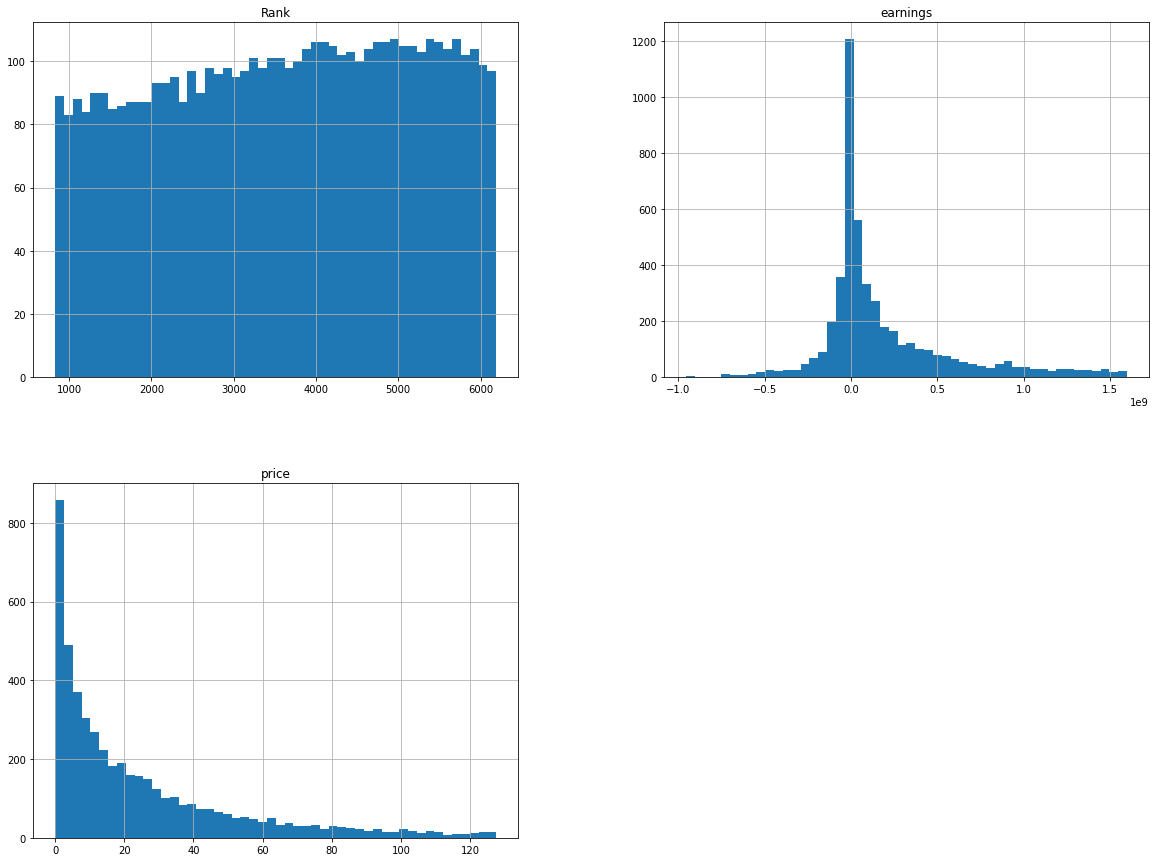

In [13]:
#karena tipe data categorical ini bermacam-macam, maka pembagiannya tidak akan teratur. jadi disini saya langsung melihat histogram dari numerical
import matplotlib.pyplot as plt
money.hist(bins=50, figsize=(20,15))
plt.show()

Multivariate Analysis

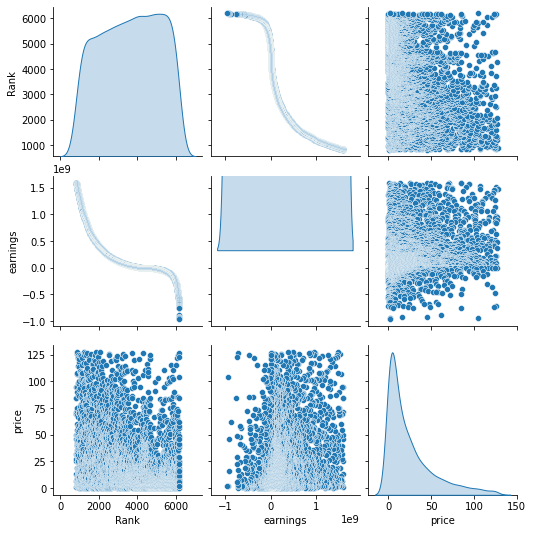

In [14]:
sns.pairplot(money[numeric], diag_kind = 'kde')

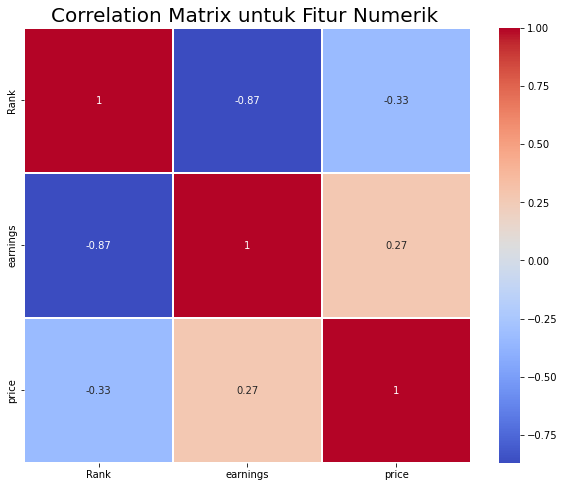

In [15]:
plt.figure(figsize=(10, 8))
correlation_matrix = money[numeric].corr().round(2)
     
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

**SPLIT DATASET**

In [16]:
from sklearn.model_selection import train_test_split

X = money[numeric].drop(['price'],axis =1)
y = money['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
                                                    
print(f'total x: {len(X)}')
print(f'total x_train: {len(X_train)}')
print(f'total x_test: {len(X_test)}')

total x: 4882
total x_train: 3905
total x_test: 977


**Standarisasi**

In [17]:
from sklearn.preprocessing import StandardScaler
     
numerical = ['Rank','earnings']
scaler = StandardScaler()
scaler.fit(X_train[numerical])
X_train[numerical] = scaler.transform(X_train.loc[:, numerical])
X_train[numerical].head()

,Rank,earnings
2043,-1.022958,0.520037
4870,0.825574,-0.504484
2609,-0.652859,0.043115
2193,-0.924876,0.382550
5259,1.079935,-0.578234


In [18]:
X_train[numerical].describe().round(4)

,Rank,earnings
count,3905.0000,3905.0000
mean,-0.0000,-0.0000
std,1.0001,1.0001
min,-1.8168,-2.9276
25%,-0.8444,-0.5116
50%,0.0409,-0.3786
75%,0.8609,0.2572
max,1.6887,3.6094


**Modeling**

In [19]:
#model dataFrame

models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [20]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

models.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [21]:
# #RF

from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=10, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred = RF.predict(X_train), y_true=y_train)          

In [22]:
# boosting

from sklearn.ensemble import AdaBoostRegressor
     
boosting = AdaBoostRegressor(learning_rate=0.01, random_state=20)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

**Model Evaluation**

In [23]:
X_test.loc[:, numerical] = scaler.transform(X_test[numerical])

In [24]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {
              'KNN': knn, 
              'RF': RF, 
              'Boosting': boosting
              }

for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
  
mse

,train,test
KNN,0.529156,0.767454
RF,0.481073,0.702677
Boosting,0.667603,0.646884


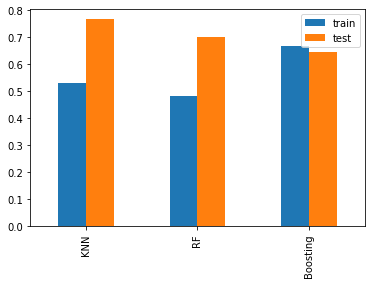

In [25]:
mse.sort_values(by ='test', ascending = False).plot(kind='bar',zorder=3)

In [26]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
     
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
2322,0.2,48.6,36.6,37.4


Dari hasil evaluasi tersebut, didapatkan informasi bahwa model dengan KNN memiliki performa yang paling besar